## From the article

# Implementing a distance-based classifier with a quantum interference circuit

###  M. Schuld et al 2017 EPL 119 60002

## Let's get the most we can from this

# Preparing the data

In [141]:
import numpy as np
import pandas as pd

In [142]:
wine = pd.read_csv("Wine/wine.data",header=None,names=["class","f0","f1","f2","f3","f4","f5","f6","f7","f8","f9","f10","f11","f12"])

In [143]:
wine

,class,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045


In [144]:
class1 = wine[wine["class"] == 1]
class2 = wine[wine["class"] == 2]
class3 = wine[wine["class"] == 3]

In [145]:
import matplotlib.pyplot as plt

lw = 1

def prePlotIris(data,x,y):
    X = data[data["class"] == 1]
    plt.scatter(X[x],X[y],color="red",marker="o",edgecolor='black', linewidth=lw,label="class 1")
    X = data[data["class"] == 2]
    plt.scatter(X[x],X[y],color="blue",marker="o",edgecolor='black', linewidth=lw,label="class 2")
    X = data[data["class"] == 3]
    plt.scatter(X[x],X[y],color="yellow",marker="o",edgecolor='black', linewidth=lw,label="class 3")
    
    plt.xlabel('sepal length in cm')
    plt.ylabel('sepal width in cm')
    plt.legend(loc='upper left')

def plotIris(data,x,y):
    prePlotIris(data,x,y)
    plt.show()

def saveIris(data,x,y,saveName):
    prePlotIris(data,x,y)
    plt.savefig('images/'+saveName, dpi=300)

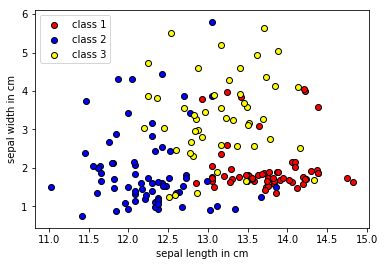

In [146]:
plotIris(wine,"f0","f1")

In [147]:
wine.describe()

,class,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [148]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
wine.loc[:,"f0":] = scaler.fit_transform(wine.loc[:,"f0":])

/home/mariano/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/mariano/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [149]:
wine.describe()

,class,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12
count,178.000000,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,1.938202,-8.619821e-16,-8.357859e-17,-8.657245e-16,-1.160121e-16,-1.995907e-17,-2.972030e-16,-4.016762e-16,4.079134e-16,-1.699639e-16,-1.247442e-18,3.717376e-16,2.919013e-16,-7.484650e-18
std,0.775035,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,1.000000,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,1.000000,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,2.000000,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,3.000000,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,3.000000,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


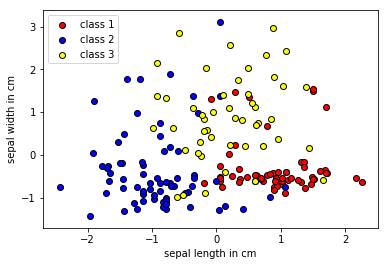

In [150]:
plotIris(wine,"f0","f1")

In [151]:
def normalize(v):
    norm = np.linalg.norm(v)
    if norm == 0: 
       return v
    return v / norm

In [152]:
wineFeatures = wine.loc[:,"f0":].copy()
for i in wineFeatures.index:
    v = []
    for feature in wineFeatures.columns:
        v.append(wineFeatures.loc[i,feature])
    v = normalize(v)
    for c, feature in enumerate(wineFeatures.columns):
        wine.loc[i,feature] = v[c-1]

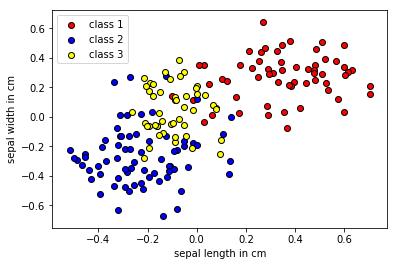

In [153]:
plotIris(wine,"f0","f1")

In [154]:
class1 = wine[wine["class"] == 1]
class2 = wine[wine["class"] == 2]
class3 = wine[wine["class"] == 3]

In [155]:
# Primi vettori dagli insiemi
# T0 = setosa.iloc[0:10].copy()
# T0.loc[:,"f0":"f3"] = T0.loc[:,"f0":"f3"].apply(np.arcsin)
# T1 = versicolor.iloc[0:11].copy()
# T1.loc[:,"f0":"f3"] = T1.loc[:,"f0":"f3"].apply(np.arcsin)
# T2 = virginica.iloc[0:11].copy()
# T2.loc[:,"f0":"f3"] = T2.loc[:,"f0":"f3"].apply(np.arcsin)

In [156]:
# random_seed : int : Random number generator seed
random_seed = 1
rgen = np.random.RandomState(random_seed)
def _shuffle(self, X, y):
    """Shuffle training data"""
    r = self.rgen.permutation(len(y))
    return X[r], y[r]

In [157]:
# Vettori presi casualmente
# Prima si crea gli array randomici completi, 
# poi li dividiamo in vettori di training ed un vettore da classificare
random1 = class1.iloc[rgen.permutation(len(class1.index))].copy()
random2 = class2.iloc[rgen.permutation(len(class2.index))].copy()
random3 = class3.iloc[rgen.permutation(len(class3.index))].copy()
# Applica la funzione arcoseno
random1.loc[:,"f0":] = random1.loc[:,"f0":].apply(np.arcsin)
random2.loc[:,"f0":] = random2.loc[:,"f0":].apply(np.arcsin)
random3.loc[:,"f0":] = random3.loc[:,"f0":].apply(np.arcsin)
# Prendi i primi n vettori per il training
training1 = random1.iloc[:3]
training2 = random2.iloc[:3]
training3 = random3.iloc[:2]
# Prendi il vettore successivo per l'input
# Essendo gli insiemi casuali, anche questo è casuale, 
# ma non appartiene all'insieme di training
input1 = random1.iloc[3]
input2 = random2.iloc[3]
input3 = random3.iloc[2]
# S0 = setosa.iloc[rgen.permutation(len(setosa.index))[:10]].copy()
# S0.loc[:,"f0":"f3"] = S0.loc[:,"f0":"f3"].apply(np.arcsin)
# S1 = versicolor.iloc[rgen.permutation(len(versicolor.index))[:11]].copy()
# S1.loc[:,"f0":"f3"] = S1.loc[:,"f0":"f3"].apply(np.arcsin)
# S2 = virginica.iloc[rgen.permutation(len(virginica.index))[:11]].copy()
# S2.loc[:,"f0":"f3"] = S2.loc[:,"f0":"f3"].apply(np.arcsin)

In [158]:
# randomSetosa.head()

In [159]:
# trainingSetosa

In [160]:
# inputSetosa

In [161]:
# Se = setosa.loc[:,"f0":"f3"].apply(np.arcsin)
# Ve = versicolor.loc[:,"f0":"f3"].apply(np.arcsin)
# Vi = virginica.loc[:,"f0":"f3"].apply(np.arcsin)

In [162]:
# Il training array completo è composto da elementi per ogni classe
trainingArray = pd.concat([training1,training2,training3])
# trainingArray.tail()

In [163]:
# Per 32 elementi servono 
len(trainingArray.index)

8

# Building the quantum circuit

To store 13 features I need 4 $i$ qubits. ($2^4=16$)  
To store 3 classes I need 2 $c$ quibits. ($2^2=4$)  
To store 6 training vectors I need 3 $m$ qubits. ($2^3=8$)  
I need some ancilla qubits for the QRAM routine.  
I need one more bit to store the conditional measurement on the rotation qubit. 

In [164]:
import qiskit
from qiskit import IBMQ
from qiskit import (
    QuantumCircuit,
    QuantumRegister,
    ClassicalRegister,
    execute,
    Aer)
from qiskit.visualization import plot_histogram
import qiskit.aqua.circuits.gates.controlled_ry_gates

In [165]:
provider = IBMQ.load_account()

/home/mariano/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:181: UserWarning: Credentials are already in use. The existing account in the session will be replaced.
  warnings.warn('Credentials are already in use. The existing '


In [166]:
print("Available backends:")
provider.backends()

Available backends:


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx4') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [167]:
def encodeVector(circuit,data,i,controls,rotationQubit,ancillaQubits):
    for counter, value in enumerate(data, 0):
        encodeIndexBitwise4(circuit,i,counter)
        circuit.mcry(value,controls,rotationQubit,ancillaQubits)
        encodeIndexBitwise4(circuit,i,counter)

In [168]:
def encodeClass(circuit,wineClass):
    if wineClass == 0:
        circuit.x(c)
    elif wineClass == 1:
        circuit.x(c[1])
    elif wineClass == 2:
        circuit.x(c[0])

In [169]:
def encodeIndexBitwise3(circuit,index):
    """
    Encode the index of the training vectors with reason
    """
    
    zerosInIndex = index ^ 0b111
    
    if zerosInIndex & 0b001:
        circuit.x(m[0])
    if zerosInIndex & 0b010:
        circuit.x(m[1])
    if zerosInIndex & 0b100:
        circuit.x(m[2])

In [170]:
def encodeIndexBitwise4(circuit,register,index):
    """
    Encode the index of the training vectors with reason
    """
    
    zerosInIndex = index ^ 0b1111
    
    if zerosInIndex & 0b0001:
        circuit.x(register[0])
    if zerosInIndex & 0b0010:
        circuit.x(register[1])
    if zerosInIndex & 0b0100:
        circuit.x(register[2])
    if zerosInIndex & 0b1000:
        circuit.x(register[3])

In [171]:
def encodeIndexBitwise6(circuit,index):
    """
    Encode the index of the training vectors with reason
    """
    
    zerosInIndex = index ^ 0b111111
    
    if zerosInIndex & 0b000001:
        circuit.x(m[0])
    if zerosInIndex & 0b000010:
        circuit.x(m[1])
    if zerosInIndex & 0b000100:
        circuit.x(m[2])
    if zerosInIndex & 0b001000:
        circuit.x(m[3])
    if zerosInIndex & 0b010000:
        circuit.x(m[4])
    if zerosInIndex & 0b100000:
        circuit.x(m[5])

In [172]:
format(2, '04b')

'0010'

In [173]:
def encodeTraining(circuit,data,i,controls,rotationQubit,ancillaQubits,c,m):
    # Header
    encodeClass(circuit,c)
    encodeIndexBitwise3(circuit,m)
    
    # Encoder
    encodeVector(circuit,data,i,controls,rotationQubit,ancillaQubits)
    
    # Footer
    encodeClass(circuit,c)
    encodeIndexBitwise3(circuit,m)

In [174]:
def buildTrainingState(trainingArray):
    """
    Given an array of up to 32 training vectors,
    build the quantum superposition state. 
    """
    for index in range(len(trainingArray.index)):
        trainingVector = trainingArray.iloc[index]
        encodeTraining(circuit,trainingVector["f0":"f3"],i,a[:]+i[:]+m[:]+c[:],r[0],q,trainingVector["class"],index)

In [175]:
N_a = 1
N_m = 3
N_i = 4
N_r = 1
N_q = 8
N_c = 2
str(N_a + N_m + N_i + N_r + N_q + N_c) + " qubit"

'19 qubit'

In [176]:
a = QuantumRegister(N_a,'a') # knn ancilla
m = QuantumRegister(N_m,'m') # training vector index
i = QuantumRegister(N_i,'i') # feature index
r = QuantumRegister(N_r,'r') # rotation qubit
q = QuantumRegister(N_q,'q') # qram ancilla
c = QuantumRegister(N_c,'c') # class
b = ClassicalRegister(4, 'bit')
circuit = QuantumCircuit(a,m,i,r,q,c,b)

circuit.h(a)
circuit.h(m)
circuit.h(i)
circuit.h(c)

# circuit.cry(theta, control, target)
# circuit.mcry(theta, controls, target, ancillae)

# >>> Encode the input vector >>>

encodeVector(circuit,input1,i,a[:]+i[:],r[0],q)

circuit.x(a)

# <<< Encode the input vector <<<

# >>> Encode the training vectors >>>

buildTrainingState(trainingArray)

# <<< Encode the training vectors <<<

circuit.measure(r,b[0])

circuit.h(a)

circuit.measure(a,b[1])
circuit.measure(c[0],b[2])
circuit.measure(c[1],b[3])

# circuit.draw(output='mpl')

In [124]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=8192)
result = job.result()
counts = result.get_counts(circuit)
print("\nTotal counts are:",counts)
# plot_histogram(counts)


Total counts are: {'1001': 22, '0110': 1, '0100': 1943, '1010': 3, '0111': 28, '0011': 47, '1000': 1961, '1111': 56, '0000': 1937, '1011': 94, '0001': 53, '0101': 80, '0010': 1, '1110': 1, '1100': 1912, '1101': 53}


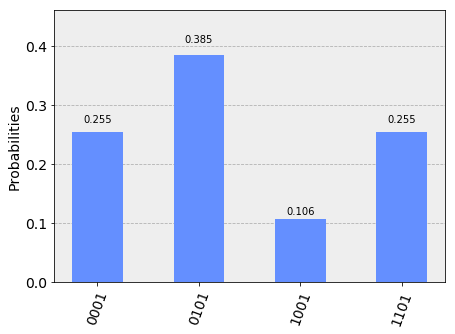

In [125]:
goodCounts = {k: counts[k] for k in counts.keys() & {'0001','0101','1001','1101'}}
plot_histogram(goodCounts)

## Online simulator

In [177]:
backend_hpc = provider.get_backend('ibmq_qasm_simulator', hub=None)

In [178]:
# Number of shots to run the program (experiment);
# maximum is 8192 shots.
shots = 8192

# Maximum number of credits to spend on executions.
max_credits = 3

job_hpc = execute(circuit, backend_hpc, shots=shots, max_credits=max_credits)

In [179]:
result_hpc = job_hpc.result()

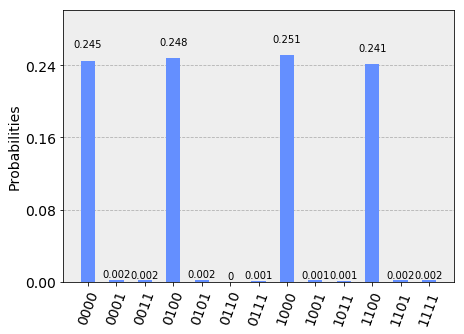

In [180]:
counts_hpc = result_hpc.get_counts(circuit)
plot_histogram(counts_hpc)

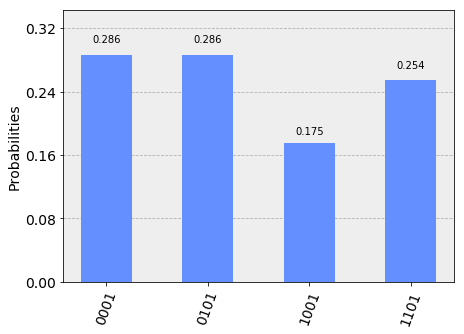

In [181]:
goodCounts_hpc = {k: counts_hpc[k] for k in counts_hpc.keys() & {'0001', '0101', '1001', '1101'}}
plot_histogram(goodCounts_hpc)

## Real hardware

In [50]:
from qiskit.providers.ibmq import least_busy

large_enough_devices = provider.backends(filters=lambda x: x.configuration().n_qubits > 8 and not x.configuration().simulator)
backend = least_busy(large_enough_devices)
print("The best backend is " + backend.name())

The best backend is ibmq_16_melbourne


In [ ]:
from qiskit.tools.monitor import job_monitor
# Number of shots to run the program (experiment);
# maximum is 8192 shots.
shots = 8192
# Maximum number of credits to spend on executions.
max_credits = 5

job_exp = execute(circuit, backend, shots=shots, max_credits=max_credits)
job_monitor(job_exp)

In [ ]:
result_exp = job_exp.result()

In [ ]:
counts_exp = result_exp.get_counts(circuit)

In [ ]:
goodCounts_exp = {k: counts_exp[k] for k in counts_exp.keys() & {'0001', '0101', '1001', '1101'}}

In [ ]:
plot_histogram(goodCounts_exp)

# Simulazione con vettori casuali

In [289]:
# backend_hpc = provider.get_backend('ibmq_qasm_simulator', hub=None)

In [390]:
randomSetosa = setosa.iloc[rgen.permutation(len(setosa.index))].copy()
randomVersicolor = versicolor.iloc[rgen.permutation(len(versicolor.index))].copy()
randomVirginica = virginica.iloc[rgen.permutation(len(virginica.index))].copy()
randomSetosa.loc[:,"f0":"f3"] = randomSetosa.loc[:,"f0":"f3"].apply(np.arcsin)
randomVersicolor.loc[:,"f0":"f3"] = randomVersicolor.loc[:,"f0":"f3"].apply(np.arcsin)
randomVirginica.loc[:,"f0":"f3"] = randomVirginica.loc[:,"f0":"f3"].apply(np.arcsin)
trainingSetosa = randomSetosa.iloc[:21]
trainingVersicolor = randomVersicolor.iloc[:22]
trainingVirginica = randomVirginica.iloc[:21]
inputSetosa = randomSetosa.iloc[21]
inputVersicolor = randomVersicolor.iloc[22]
inputVirginica = randomVirginica.iloc[21]
trainingArray = pd.concat([trainingSetosa,trainingVersicolor,trainingVirginica])

In [391]:
a = QuantumRegister(1,'a') # knn ancilla
m = QuantumRegister(6,'m') # training vector index
i = QuantumRegister(2,'i') # feature index
r = QuantumRegister(1,'r') # rotation qubit
q = QuantumRegister(9,'q') # qram ancilla
c = QuantumRegister(2,'c') # class
b = ClassicalRegister(4, 'bit')
circuit = QuantumCircuit(a,m,i,r,q,c,b)

circuit.h(a)
circuit.h(m)
circuit.h(i)
circuit.h(c)

# circuit.cry(theta, control, target)
# circuit.mcry(theta, controls, target, ancillae)

# >>> Encode the input vector >>>

encodeVector(circuit,inputVersicolor,i,a[:]+i[:],r[0],q)

circuit.x(a)

# <<< Encode the input vector <<<

# >>> Encode the training vectors >>>

buildTrainingState(trainingArray)

# <<< Encode the training vectors <<<

circuit.measure(r,b[0])

circuit.h(a)

circuit.measure(a,b[1])
circuit.measure(c[0],b[2])
circuit.measure(c[1],b[3])

# circuit.draw(output='mpl')

# Number of shots to run the program (experiment);
# maximum is 8192 shots.
shots = 8192

# Maximum number of credits to spend on executions.
max_credits = 3

job_hpc = execute(circuit, backend_hpc, shots=shots, max_credits=max_credits)

result_hpc = job_hpc.result()
counts_hpc = result_hpc.get_counts(circuit)
# plot_histogram(counts_hpc)

'done'

'done'

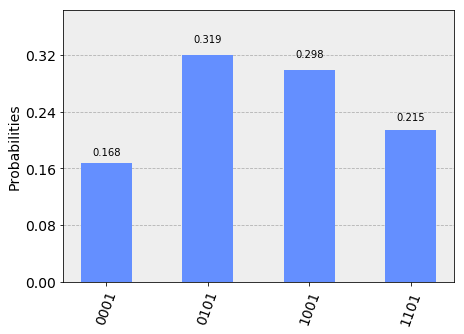

In [392]:
goodCounts_hpc = {k: counts_hpc[k] for k in counts_hpc.keys() & {'0001', '0101', '1001', '1101'}}
plot_histogram(goodCounts_hpc)